<a href="https://colab.research.google.com/github/Seghelicious/Deep-Learning/blob/master/Predicting_Student_Admissions_with_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I am predicting student admissions to the UCLA Graduate school based on three pieces of data:

- GRE Scores (Test)
- GPA Scores (Grades)
- Class rank (1 - 4)
The dataset is sourced from: http://www.ats.ucla.edu/

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


##**Loading the Data**##

In [2]:
# Importing pandas and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# Reading the csv file into a pandas DataFrame
student_data = pd.read_csv('/content/drive/My Drive/Udacity - Deep Learning /student_data.csv')

# Printing out the first 10 rows of our data
student_data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


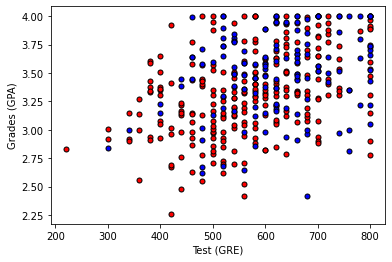

In [3]:
# Function to help us plot
def plot_points(student_data):
    X = np.array(student_data[['gre', 'gpa']])
    y = np.array(student_data['admit'])
    admitted = X[np.argwhere(y == 1)]
    rejected = X[np.argwhere(y == 0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'blue', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Plotting the points
plot_points(student_data)
plt.show()

Roughly, it looks like the students with high scores in the grades and test passed, while the ones with low scores didn't, but the data is not as nicely separable as we hoped it would. I will make 4 plots, with each plot representing a rank.

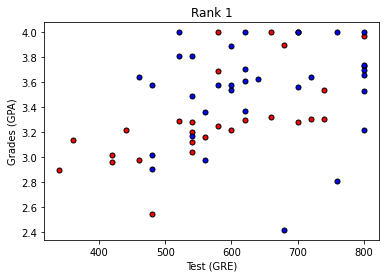

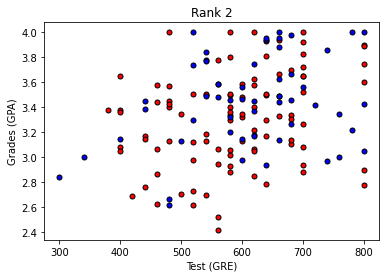

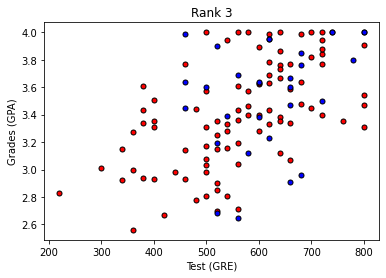

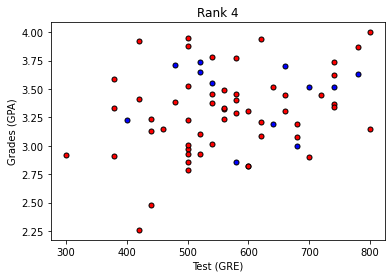

In [4]:
# Separating the ranks
rank1 = student_data[student_data['rank'] == 1]
rank2 = student_data[student_data['rank'] == 2]
rank3 = student_data[student_data['rank'] == 3]
rank4 = student_data[student_data['rank'] == 4]

# Plotting the graphs
plot_points(rank1)
plt.title('Rank 1')
plt.show()
plot_points(rank2)
plt.title('Rank 2')
plt.show()
plot_points(rank3)
plt.title('Rank 3')
plt.show()
plot_points(rank4)
plt.title('Rank 4')
plt.show()

This looks more promising, as it seems that the lower the rank, the higher the acceptance rate. I will one-hot encode the rank and use it as one of the inputs. 

In [5]:
# Make dummy variables for rank
student_data_ohe = pd.concat([student_data, pd.get_dummies(student_data['rank'], prefix = 'rank')], axis = 1)

# Drop the previous rank column
student_data_ohe = student_data_ohe.drop('rank', axis = 1)

# Print the first 10 rows of our data
student_data_ohe.head(10)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


The next step is to scale the data. We notice that the range for grades is 1.0-4.0, whereas the range for test scores is roughly 200-800, which is much larger. This means our data is skewed, and that makes it hard for a neural network to handle. Let's fit our two features into a range of 0-1, by dividing the grades by 4.0, and the test score by 800.

In [0]:
minmax_scaler = preprocessing.MinMaxScaler()
scaled = minmax_scaler.fit_transform(student_data[['gre', 'gpa']])
scaled = pd.DataFrame(data = scaled[:, :], columns = ['gre', 'gpa'])

In [0]:
processed_data = student_data_ohe.copy()

In [0]:
processed_data['gre'] = scaled['gre']
processed_data['gpa'] = scaled['gpa']

In [9]:
processed_data.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.275862,0.775862,0,0,1,0
1,1,0.758621,0.810345,0,0,1,0
2,1,1.000000,1.000000,1,0,0,0
3,1,0.724138,0.534483,0,0,0,1
4,0,0.517241,0.385057,0,0,0,1


In [0]:

# Scaling the columns
#processed_data['gre'] = processed_data['gre']/800
#processed_data['gpa'] = processed_data['gpa']/4.0
#processed_data[:10]

##**Splitting the data into Test and Train sets**##

In [11]:
sample = np.random.choice(processed_data.index, size = int(len(processed_data) * 0.75), replace = False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print('Number of training samples is', len(train_data))
print('Number of testing samples is', len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 300
Number of testing samples is 100
     admit       gre       gpa  rank_1  rank_2  rank_3  rank_4
74       0  0.862069  0.683908       0       0       0       1
115      0  0.689655  0.994253       0       0       1       0
66       0  0.896552  0.781609       0       0       0       1
51       0  0.379310  0.500000       0       0       0       1
254      1  0.896552  0.724138       0       0       0       1
43       0  0.482759  0.603448       0       0       1       0
168      0  0.482759  1.000000       0       0       1       0
67       0  0.689655  0.597701       1       0       0       0
70       0  0.724138  1.000000       0       0       1       0
278      1  0.793103  0.425287       0       0       0       1
    admit       gre       gpa  rank_1  rank_2  rank_3  rank_4
1       1  0.758621  0.810345       0       0       1       0
3       1  0.724138  0.534483       0       0       0       1
6       1  0.586207  0.413793       1       0       0 

##**Splitting the data into features and targets (labels)**##

In [12]:
features = train_data.drop('admit', axis = 1)
targets = train_data['admit']
features_test = test_data.drop('admit', axis = 1)
targets_test = test_data['admit']

print(features[:10])
print(targets[:10])

          gre       gpa  rank_1  rank_2  rank_3  rank_4
74   0.862069  0.683908       0       0       0       1
115  0.689655  0.994253       0       0       1       0
66   0.896552  0.781609       0       0       0       1
51   0.379310  0.500000       0       0       0       1
254  0.896552  0.724138       0       0       0       1
43   0.482759  0.603448       0       0       1       0
168  0.482759  1.000000       0       0       1       0
67   0.689655  0.597701       1       0       0       0
70   0.724138  1.000000       0       0       1       0
278  0.793103  0.425287       0       0       0       1
74     0
115    0
66     0
51     0
254    1
43     0
168    0
67     0
70     0
278    1
Name: admit, dtype: int64


##**Training the 2-Layer Neural Network**##

In [0]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
    
def error_formula(y, output):
    return - y * np.log(output) - (1 - y) * np.log(1-output)

##**Backpropagating the Data**##

In [0]:
def error_term_formula(x, y, output):
    return (y - output) * sigmoid_prime(x)

In [15]:
# Neural Network hyperparameters
epochs = 1000
learnrate = 3.5

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale = 1 / n_features ** .5, size = n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.2569362257526722
Epoch: 100
Train loss:  0.21267399250660482
Epoch: 200
Train loss:  0.20797555250254177
Epoch: 300
Train loss:  0.2046394266843967
Epoch: 400
Train loss:  0.2022529782143285
Epoch: 500
Train loss:  0.200540137250401
Epoch: 600
Train loss:  0.199304115521258
Epoch: 700
Train loss:  0.19840713073259772
Epoch: 800
Train loss:  0.1977528363413798
Epoch: 900
Train loss:  0.19727352265158637
Finished training!


##**Calculating the Accuracy on the Test Data**##

In [16]:
# Calculate accuracy on test data
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print('Prediction accuracy: {:.3f}'.format(accuracy))

Prediction accuracy: 0.740
